# Week1.Homework

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data

Link to data: [NYC Taxi](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [2]:
df_jan = pd.read_parquet('fhv_tripdata_2022-01.parquet')
df_feb = pd.read_parquet('fhv_tripdata_2022-02.parquet')

In [3]:
df_jan.shape, df_feb.shape

((1143691, 7), (1251504, 7))

In [4]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2022-01-01 00:31:00,2022-01-01 01:05:00,NaN,NaN,None,B00009
1,B00009,2022-01-01 00:37:00,2022-01-01 01:05:00,NaN,NaN,None,B00009
2,B00037,2022-01-01 00:56:37,2022-01-01 01:06:11,NaN,85.0,None,B00037
3,B00037,2022-01-01 00:19:54,2022-01-01 00:30:47,NaN,85.0,None,B00037
4,B00037,2022-01-01 00:41:49,2022-01-01 00:52:16,NaN,188.0,None,B00037


In [5]:
df_feb.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00014,2022-02-01 00:15:00,2022-02-01 00:31:00,NaN,NaN,None,B00014
1,B00021,2022-02-01 00:08:40,2022-02-01 00:42:54,95.0,173.0,None,B00021
2,B00021,2022-02-01 00:45:26,2022-02-01 01:04:37,192.0,70.0,None,B00021
3,B00021,2022-02-01 00:50:39,2022-02-01 01:29:06,173.0,147.0,None,B00021
4,B00021,2022-02-01 00:22:17,2022-02-01 00:27:29,129.0,129.0,None,B00021


In [6]:
def calculate_duration(df):
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    return df

In [7]:
df_jan = calculate_duration(df_jan)
df_feb = calculate_duration(df_feb)

In [8]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2022-01-01 00:31:00,2022-01-01 01:05:00,NaN,NaN,None,B00009,34.000000
1,B00009,2022-01-01 00:37:00,2022-01-01 01:05:00,NaN,NaN,None,B00009,28.000000
2,B00037,2022-01-01 00:56:37,2022-01-01 01:06:11,NaN,85.0,None,B00037,9.566667
3,B00037,2022-01-01 00:19:54,2022-01-01 00:30:47,NaN,85.0,None,B00037,10.883333
4,B00037,2022-01-01 00:41:49,2022-01-01 00:52:16,NaN,188.0,None,B00037,10.450000


In [9]:
df_feb.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00014,2022-02-01 00:15:00,2022-02-01 00:31:00,NaN,NaN,None,B00014,16.000000
1,B00021,2022-02-01 00:08:40,2022-02-01 00:42:54,95.0,173.0,None,B00021,34.233333
2,B00021,2022-02-01 00:45:26,2022-02-01 01:04:37,192.0,70.0,None,B00021,19.183333
3,B00021,2022-02-01 00:50:39,2022-02-01 01:29:06,173.0,147.0,None,B00021,38.450000
4,B00021,2022-02-01 00:22:17,2022-02-01 00:27:29,129.0,129.0,None,B00021,5.200000


In [11]:
print(f'Mean duration: {df_jan.duration.mean()}')

Mean duration: 22.55080323269373


/home/mlops_zoomcamp/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

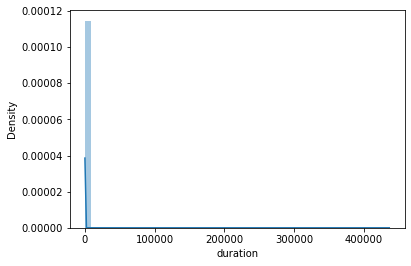

In [12]:
sns.distplot(df_jan.duration)

In [15]:
df_jan[(df_jan.duration < 1) | (df_jan.duration > 60)].shape

(58983, 8)

In [16]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]
df_jan.shape

(1084708, 8)

/home/mlops_zoomcamp/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

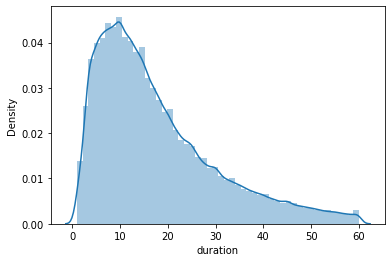

In [17]:
sns.distplot(df_jan.duration)

In [18]:
df_jan.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [20]:
df_jan.PUlocationID.fillna(-1, inplace=True)
df_jan.DOlocationID.fillna(-1, inplace=True)

In [27]:
print(f'PU location NaN fraction: {(df_jan.PUlocationID == -1).sum() * 100 / len(df_jan.PUlocationID):.2f}')
print(f'DO location NaN fraction: {(df_jan.DOlocationID == -1).sum() * 100 / len(df_jan.DOlocationID):.2f}')

PU location NaN fraction: 77.10
DO location NaN fraction: 10.25


In [28]:
columns = ['PUlocationID', 'DOlocationID']

In [32]:
dv = DictVectorizer()

df_jan[columns] = df_jan[columns].astype(str)
jan_dicts = df_jan[columns].to_dict(orient='records')
X_jan = dv.fit_transform(jan_dicts)
X_jan.shape

(1084708, 522)

In [33]:
target = 'duration'
y_jan = df_jan[target].values

In [36]:
lr = LinearRegression()

lr.fit(X_jan, y_jan)
y_pred = lr.predict(X_jan)

In [37]:
mean_squared_error(y_jan, y_pred, squared=False)

11.262401673013436

## Main part

In [54]:
def read_data(filename, categorical):
    df = pd.read_parquet(filename)
    df = calculate_duration(df)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    df[categorical] = df[categorical].fillna(-1)
    df[categorical] = df[categorical].astype(str)
    
    return df

In [61]:
def prepare_data(df, dv, columns, is_pretrained=False):
    dicts = df[columns].to_dict(orient='records')
    if not is_pretrained:
        dv.fit(dicts)
    X_ = dv.transform(dicts)
    
    return X_, dv

In [56]:
train_filename = 'fhv_tripdata_2022-01.parquet'
val_filename = 'fhv_tripdata_2022-02.parquet'

In [57]:
train = read_data(train_filename, columns)
val = read_data(val_filename, columns)
print(train.shape, val.shape)

(1084708, 8) (1165259, 8)


In [63]:
dv = DictVectorizer()
X_train, dv = prepare_data(train, dv, columns)
X_val, _ = prepare_data(val, dv, columns, False)
X_train.shape, X_val.shape

((1084708, 522), (1165259, 522))

In [73]:
target = 'duration'
y_train = train[target].values
y_val = val[target].values

In [74]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_tr = lr.predict(X_train)
y_pred_val = lr.predict(X_val)

In [75]:
print(f'Train RMSE: {mean_squared_error(y_train, y_pred_tr, squared=False)}')

Train RMSE: 11.262401673013436


In [76]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred_val, squared=False)}')

Val RMSE: 12.019509318223712
